In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import warnings
import sys
from transformers import pipeline

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."


In [3]:
# Select the 2 columns we need
df = df[['listed_in', 'description']]
# Split the text and get the length thereafter
df['text_length'] = df['description'].str.split().str.len()
# Sort the new dataframe by the text length
df2 = df.sort_values(by = ['text_length'], ascending = False)
df2.head()


,listed_in,description,text_length
4948,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48
6221,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44
215,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44
593,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44
5990,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42


In [4]:
# Create a new DF that has only products with more than text length of 40
df2 = df2[df2['text_length']>40]
# Reset the index of the new DF
df2 = df2.reset_index(drop = True)
df2

,listed_in,description,text_length
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42
5,"Action & Adventure, International Movies","Leader of the Ten Kwangtung Tigers, Tieh Chiao-san works with his kung fu students to protect his village from crime. But when an opium dealer starts to ruin the town, Tieh Chiao-san struggles to fight back, thanks to his growing opium addiction.",42
6,Dramas,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.",41
7,"Action & Adventure, Anime Features, Sci-Fi & Fantasy","When a group of vicious Sinners plots to escape from this eternal prison in Hell, they discover that Substitute Soul Reaper Ichigo is the key to their freedom. The Sinners launch an attack and in the process kidnap Ichigo's younger sister.",41
8,"Action & Adventure, Comedies, Dramas","Paul Newman proves he's still got prodigious acting chops, playing an aging bank robber who may have one last job in him. Faking a stroke, the incarcerated Newman is transferred to a nursing home and the care of a skeptical nurse.",41


In [5]:
all_categories=",".join([cat for cat in df2['listed_in']])

unique_categories=set(all_categories.split(","))
unique_categories
print("Number of Unique Categories ",len(unique_categories), unique_categories)

Number of Unique Categories  8 {'Dramas', 'Action & Adventure', ' International Movies', ' Comedies', ' Anime Features', ' Dramas', 'Children & Family Movies', ' Sci-Fi & Fantasy'}


In [6]:
def isCategory(aspectCategory,category):
    if category in aspectCategory:
        return 1
    else:
        return 0

In [7]:
for cat in unique_categories:
    df2[cat]= df2['listed_in'].apply(lambda x:isCategory(x,cat))

df2.head()

,listed_in,description,text_length,Dramas,Action & Adventure,International Movies,Comedies,Anime Features,Dramas,Children & Family Movies,Sci-Fi & Fantasy
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48,1,0,1,0,0,0,0,0
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44,0,0,0,0,0,0,1,0
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44,1,1,1,0,0,1,0,0
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44,0,0,0,1,0,0,1,0
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42,0,1,1,0,0,0,0,0


In [8]:
# Initializing Zero-Shot Classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [9]:
# sequences_to_classify
sequences = df2.iloc[2]["description"]

# candidate_labels
labels = ["Actions", "Adventure", "Crime", "Violence", "Finance", "Food"]

# Running the classifier
classifier(sequences, labels, multi_label=True)

{'sequence': 'Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.',
 'labels': ['Actions', 'Violence', 'Crime', 'Adventure', 'Finance', 'Food'],
 'scores': [0.8735321164131165,
  0.844319224357605,
  0.4216243028640747,
  0.215681791305542,
  0.004167914856225252,
  0.0024876457173377275]}

In [10]:
#Trial : Example
#When given the irrelevant labels to the classifier

# sequences_to_classify
sequences = df2.iloc[2]["description"]

# candidate_labels
labels = [ "comedy", "Finance", "Food","gaming"]

# Running the classifier
classifier(sequences, labels, multi_label=True)

{'sequence': 'Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.',
 'labels': ['Finance', 'Food', 'gaming', 'comedy'],
 'scores': [0.004167914856225252,
  0.0024876457173377275,
  0.0003815678064711392,
  0.00018473993986845016]}

In [11]:
####PREDICT ON WSHOLE DATASET####

In [12]:
zero_shot_classes=list(unique_categories)

In [13]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

df2['zero_shot_output']=df2['description'].progress_apply(lambda x:classifier(x,zero_shot_classes,
                            multi_label=True,hypothesis_template="Based on a true story{}"))

  0%|          | 0/9 [00:00<?, ?it/s]

In [14]:
df2.to_csv("Netflix_Zero_Shot_Prediction.csv",index=False)

In [15]:
def getLabelScore(zero_shot_output):
    labels=zero_shot_output['labels']
    scores=zero_shot_output['scores']
    num_labels=len(labels)
    score_dict={label:scores[idx] for idx,label in enumerate(labels)}
    return score_dict

def predictedScore(zero_shot_label_score,label):
    return zero_shot_label_score[label]

def is_predicted(zero_shot_label_score,label, threshold=0.5):
    if zero_shot_label_score[label]>=threshold:
        return 1
    else:
        return 0

In [16]:
import ast
#data['zero_shot_output']=data['zero_shot_output'].apply(lambda x:ast.literal_eval(x))
df2['zero_shot_label_score'] =df2['zero_shot_output'].apply(lambda x:getLabelScore(x))

In [17]:
df2.head()

,listed_in,description,text_length,Dramas,Action & Adventure,International Movies,Comedies,Anime Features,Dramas,Children & Family Movies,Sci-Fi & Fantasy,zero_shot_output,zero_shot_label_score
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48,1,0,1,0,0,0,0,0,"{'sequence': 'An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.', 'labels': ['Dramas', 'Children & Family Movies', 'Action & Adventure', ' International Movies', ' Dramas', ' Sci-Fi & Fantasy', ' Comedies', ' Anime Features'], 'scores': [0.6809398531913757, 0.5358090996742249, 0.43985792994499207, 0.13803474605083466, 0.09333542734384537, 0.02892826497554779, 0.024922803044319153, 0.018453363329172134]}","{'Dramas': 0.6809398531913757, 'Children & Family Movies': 0.5358090996742249, 'Action & Adventure': 0.43985792994499207, ' International Movies': 0.13803474605083466, ' Dramas': 0.09333542734384537, ' Sci-Fi & Fantasy': 0.02892826497554779, ' Comedies': 0.024922803044319153, ' Anime Features': 0.018453363329172134}"
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44,0,0,0,0,0,0,1,0,"{'sequence': 'Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.', 'labels': ['Children & Family Movies', 'Action & Adventure', 'Dramas', ' International Movies', ' Dramas', ' Anime Features', ' Sci-Fi & Fantasy', ' Comedies'], 'scores': [0.9415068626403809, 0.8892443776130676, 0.5117152333259583, 0.21766439080238342, 0.13990114629268646, 0.12456004321575165, 0.10370200127363205, 0.09905562549829483]}","{'Children & Family Movies': 0.9415068626403809, 'Action & Adventure': 0.8892443776130676, 'Dramas': 0.5117152333259583, ' International Movies': 0.21766439080238342, ' Dramas': 0.13990114629268646, ' Anime Features': 0.12456004321575165, ' Sci-Fi & Fantasy': 0.10370200127363205, ' Comedies': 0.09905562549829483}"
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44,1,1,1,0,0,1,0,0,"{'sequence': 'Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.', 'labels': ['Action & Adventure', ' International Movies', 'Dramas', ' Dramas', ' Anime Features', ' Sci-Fi & Fantasy', 'Children & Family Movies', ' Comedies'], 'scores': [0.9430555701255798, 0.8655527234077454, 0.12100870907306671, 0.048374954611063004, 0.03195943683385849, 0.01264088973402977, 0.005947161931544542, 0.001454131561331451]}","{'Action & Adventure': 0.9430555701255798, ' International Movies': 0.8655527234077454, 'Dramas': 0.12100870907306671, ' Dramas': 0.048374954611063004, ' Anime Features': 0.03195943683385849, ' Sci-Fi & Fantasy': 0.01264088973402977, 'Children & Family Movies': 0.005947161931544542, ' Comedies': 0.001454131561331451}"
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal

In [18]:
for cat in zero_shot_classes:
    df2[cat+"_pred_score"]=df2['zero_shot_label_score'].apply(lambda x:predictedScore(x,cat))

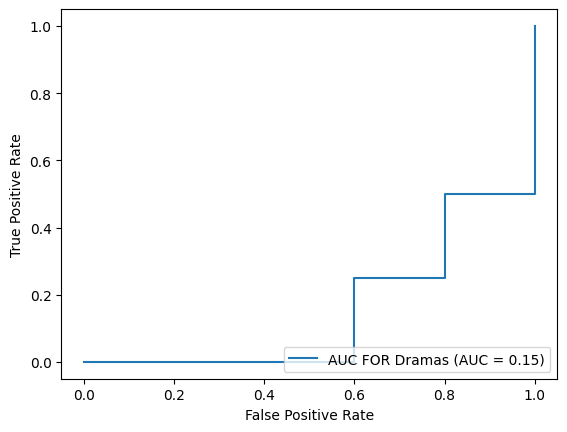

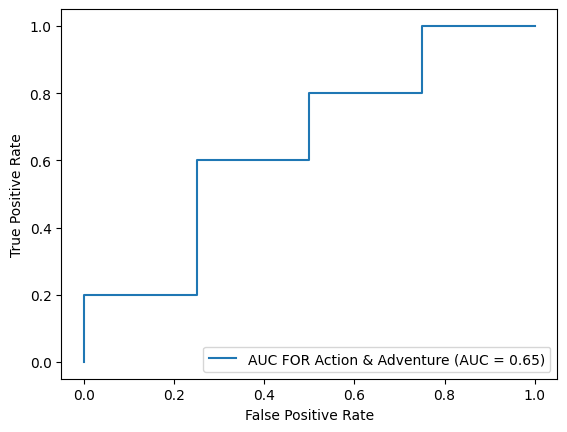

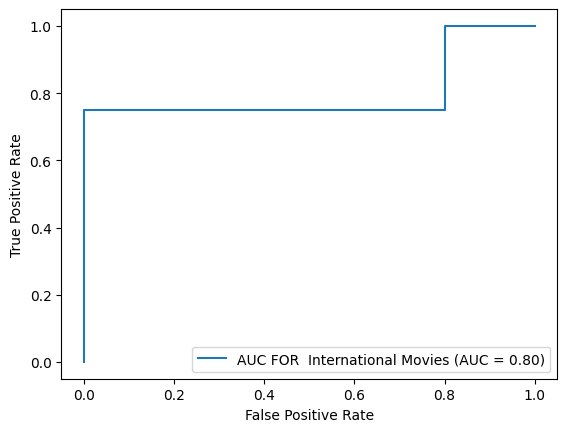

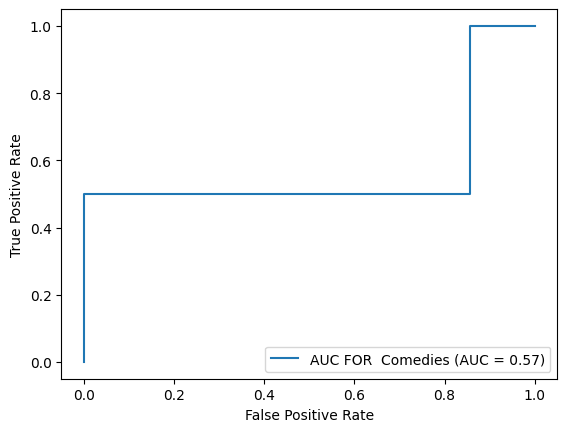

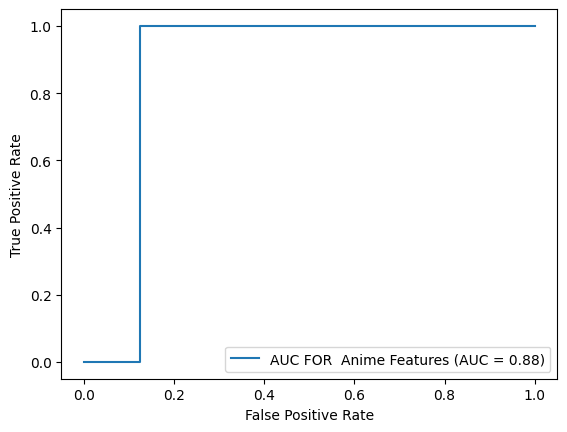

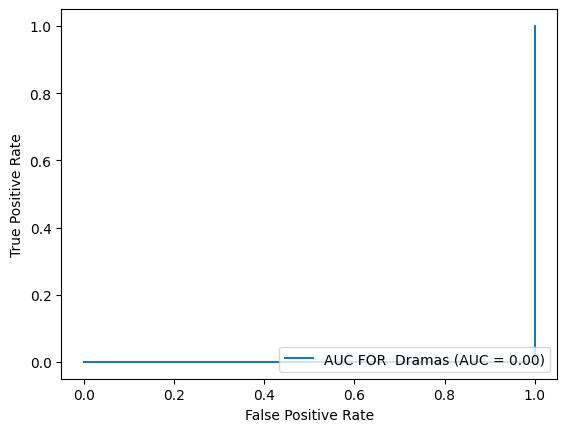

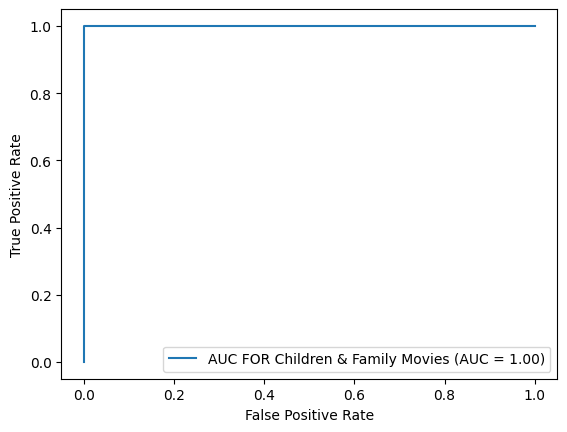

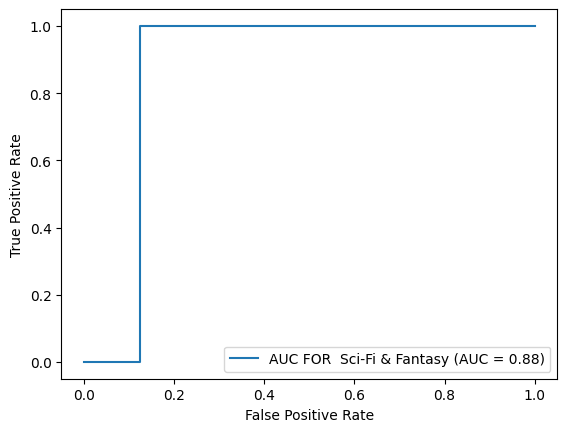

In [19]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
for cat in unique_categories:
    fpr, tpr, thresholds = roc_curve(df2[cat], df2[cat+"_pred_score"])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='AUC FOR '+cat)
    display.plot()

In [20]:
threshold={}
for cat in unique_categories:
    fpr, tpr, thresholds = roc_curve(df2[cat], df2[cat+"_pred_score"])
    gmean = np.sqrt(tpr * (1 - fpr))
    print("Category "+cat)
    # Find the optimal threshold
    index = np.argmax(gmean)
    thresholdOpt = round(thresholds[index], ndigits = 4)
    gmeanOpt = round(gmean[index], ndigits = 4)
    fprOpt = round(fpr[index], ndigits = 4)
    tprOpt = round(tpr[index], ndigits = 4)
    print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
    threshold[cat]=thresholdOpt
    print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Category Dramas
Best Threshold: 0.6809 with G-Mean: 0.3162
FPR: 0.6, TPR: 0.25
Category Action & Adventure
Best Threshold: 0.9431 with G-Mean: 0.6708
FPR: 0.25, TPR: 0.6
Category  International Movies
Best Threshold: 0.4421 with G-Mean: 0.866
FPR: 0.0, TPR: 0.75
Category  Comedies
Best Threshold: 0.2459 with G-Mean: 0.7071
FPR: 0.0, TPR: 0.5
Category  Anime Features
Best Threshold: 0.3536 with G-Mean: 0.9354
FPR: 0.125, TPR: 1.0
Category  Dramas
Best Threshold: 1.2807 with G-Mean: 0.0
FPR: 0.0, TPR: 0.0
Category Children & Family Movies
Best Threshold: 0.9415 with G-Mean: 1.0
FPR: 0.0, TPR: 1.0
Category  Sci-Fi & Fantasy
Best Threshold: 0.1638 with G-Mean: 0.9354
FPR: 0.125, TPR: 1.0


In [21]:
## Setting Threshold of 0.9 and getting the predictions for the classes as 1 or 0
for cat in unique_categories:
    df2[cat+"_pred"]=df2['zero_shot_label_score'].apply(lambda x:is_predicted(x,cat,threshold=0.9))

In [22]:
from sklearn.metrics import hamming_loss
Y=np.array(df2[zero_shot_classes])
Y_pred=np.array(df2[[cat+"_pred" for cat in zero_shot_classes]])
print("Hamming Loss across all categories is ")
print(hamming_loss(Y, Y_pred))

Hamming Loss across all categories is 
0.2361111111111111
